In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [100]:
data=pd.read_csv('train.csv')
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S


In [62]:
print('shape of titanic data set is :',titanic.shape)
print('shape of titanic data set is :',titanic.size)

shape of titanic data set is : (891, 10)
shape of titanic data set is : 8910


In [101]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


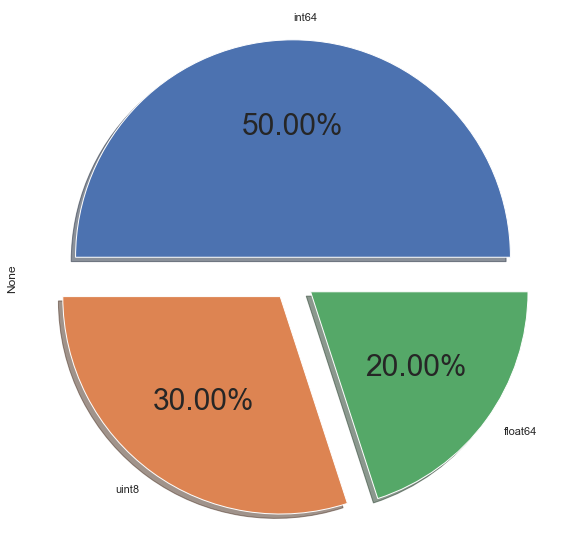

In [93]:
plt.figure(figsize=(20,10))
titanic.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.show()

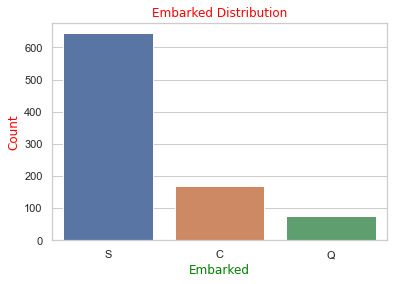

In [104]:
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=data,x='Embarked')
plt.title('Embarked Distribution',color='Red',loc='center',font='Lucida Calligraphy');
plt.xlabel('Embarked',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

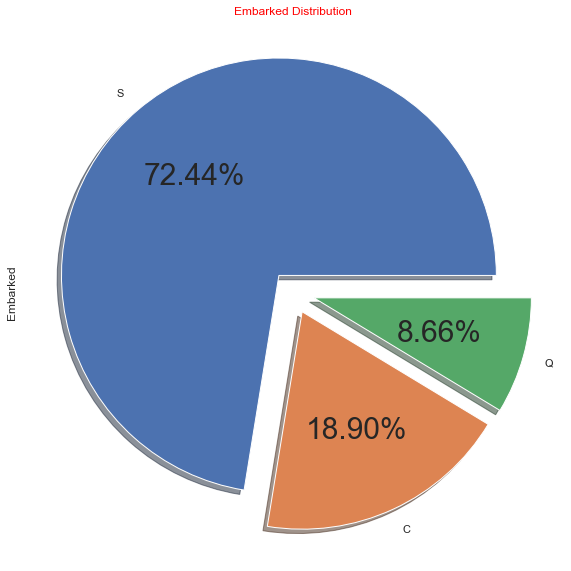

In [105]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 30})
data['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='Red',loc='center');

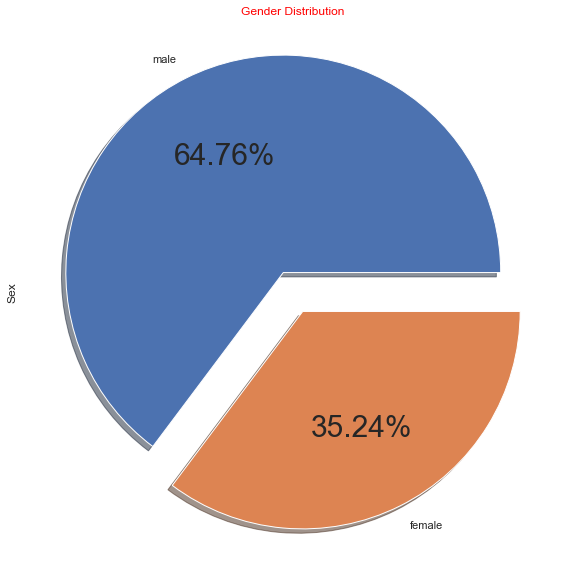

In [106]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 30})
data['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

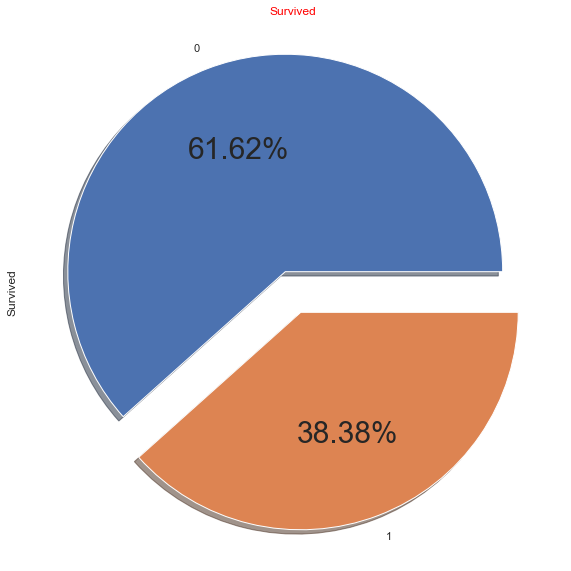

In [107]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 30})
data['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

In [111]:
data.corr().style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


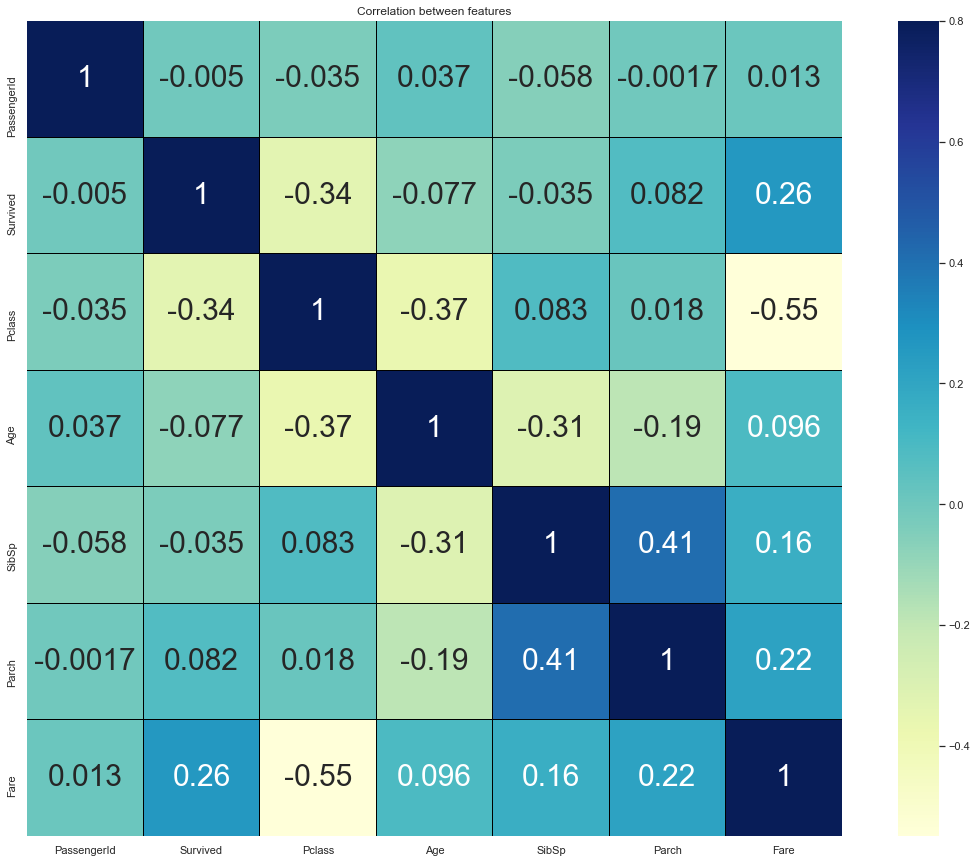

In [110]:
corr=data.corr()#["Survived"]
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

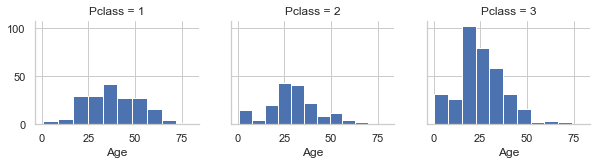

In [112]:
g = sns.FacetGrid(data, col="Pclass")
g = g.map(plt.hist, "Age")

In [73]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

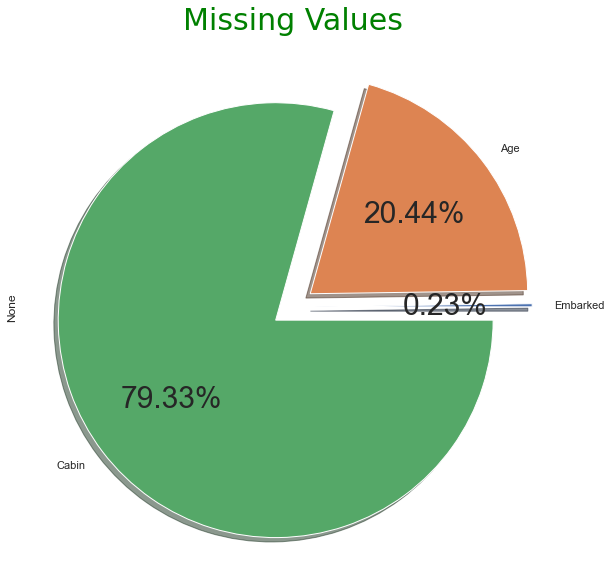

In [113]:
plt.figure(figsize=(20,10))
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1, 0.1, 0.1],
                        autopct='%1.2f%%',
                        shadow=True)
plt.title('Missing Values',
          color='Green',
          loc='center',
          font='Lucida Calligraphy');

In [114]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [115]:
data['Embarked'] = data['Embarked'].fillna(method='bfill')
data = data.drop(['Cabin'],axis=1)

In [116]:
data = data.drop(['Name','Ticket'],axis=1)

In [117]:
data = pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [118]:
X = data.drop(['Survived'],axis=1) 
y = data['Survived']

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [83]:
display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.360492,-1.584396,0.010681,-0.479698,-0.460682,-0.018600,0.728823,-0.311564,-1.611198
1,-1.632266,-1.584396,-0.119643,-0.479698,-0.460682,0.079245,0.728823,-0.311564,0.620656
2,-1.344650,-1.584396,-0.503148,-0.479698,0.810657,0.646624,0.728823,-0.311564,-1.611198
3,-1.686680,-0.381742,-1.193456,0.493365,-0.460682,-0.031329,-1.372075,-0.311564,-1.611198
4,-1.111449,0.820913,0.033758,-0.479698,-0.460682,-0.479818,0.728823,-0.311564,0.620656


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.676433,0.820913,-0.273045,0.493365,-0.460682,-0.315867,-1.372075,-0.311564,0.620656
1,-0.248601,0.820913,-0.809952,-0.479698,-0.460682,-0.485419,0.728823,-0.311564,0.620656
2,1.096196,0.820913,-0.733251,-0.479698,-0.460682,-0.467343,0.728823,-0.311564,0.620656
3,1.488753,0.820913,0.010681,-0.479698,-0.460682,0.506858,0.728823,-0.311564,0.620656
4,0.027354,-0.381742,0.493964,0.493365,2.081997,-0.078596,0.728823,-0.311564,0.620656


In [84]:
#logiticregression
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 80.2
Model Accuracy Score : 79.89


In [85]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 85.11
Model Accuracy Score  : 80.45


In [87]:
#kneighborsclassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 90.03
Model Accuracy Score  : 75.98


In [88]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train)
print("Model Accuracy Score  :",gaussian_accuracy)

Training Accuracy     : 79.21
Model Accuracy Score  : 81.56


In [89]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
print("Training Accuracy    :",perceptron_train)
print("Model Accuracy Score :",perceptron_accuracy)

Training Accuracy    : 73.17
Model Accuracy Score : 72.07


In [90]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 72.63
